In [2]:
import pandas as pd
import sys
import os
from os import listdir
os.chdir("c:/Users/Robert/Documents/Projekte/dev/sport_betting/")
import config as CONFIG
pd.set_option('display.max_columns', 500)

In [3]:
from src.data.provide_data import get_model_data
from src.models.evaluate import custom_classification_report, custom_lazy_report



In [4]:
X_train, y_train = get_model_data(filename = "Train")
X_valid, y_valid = get_model_data(filename = "Valid")
X_test, y_test = get_model_data(filename = "Test")

cat = [X_train.columns.get_loc(i) for i in ["Team","Div","Opponent"]]

Train 9440
Valid 2218
Test 2332


In [135]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler object
scaler = StandardScaler()

# Fit scaler on training data
scaler.fit(X_train)

# Scale training and test data
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

# Baseline Model

In [170]:
from lazypredict.Supervised import LazyClassifier

lazy_clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = lazy_clf.fit(X_train, X_valid, y_train, y_valid)
models

100%|██████████| 29/29 [01:09<00:00,  2.41s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.66,0.64,0.64,0.66,0.04
NearestCentroid,0.65,0.64,0.64,0.65,0.04
BernoulliNB,0.64,0.64,0.64,0.64,0.04
ExtraTreesClassifier,0.67,0.64,0.64,0.67,1.47
LinearDiscriminantAnalysis,0.68,0.63,0.63,0.67,0.09
RidgeClassifierCV,0.68,0.63,0.63,0.66,0.07
RidgeClassifier,0.68,0.63,0.63,0.66,0.04
LinearSVC,0.68,0.63,0.63,0.66,1.89
LogisticRegression,0.68,0.63,0.63,0.66,0.20


In [189]:
custom_lazy_report(X_test,y_test,lazy_clf)


AdaBoostClassifier
BaggingClassifier
BernoulliNB
CalibratedClassifierCV
DecisionTreeClassifier
DummyClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianNB
KNeighborsClassifier
LabelPropagation
LabelSpreading
LinearDiscriminantAnalysis
LinearSVC
LogisticRegression
NearestCentroid
NuSVC
PassiveAggressiveClassifier
Perceptron
QuadraticDiscriminantAnalysis
RandomForestClassifier
RidgeClassifier
RidgeClassifierCV
SGDClassifier
SVC
XGBClassifier
LGBMClassifier


,recall,precision,auc,f_1,accuracy
CalibratedClassifierCV,0.68,0.68,0.72,0.48,0.68
GaussianNB,0.67,0.67,0.72,0.58,0.67
LinearDiscriminantAnalysis,0.68,0.68,0.72,0.48,0.68
LogisticRegression,0.68,0.68,0.72,0.48,0.68
BernoulliNB,0.65,0.65,0.71,0.59,0.65
LGBMClassifier,0.68,0.68,0.71,0.51,0.68
AdaBoostClassifier,0.68,0.68,0.71,0.52,0.68
ExtraTreesClassifier,0.68,0.68,0.70,0.53,0.68
RandomForestClassifier,0.67,0.67,0.70,0.52,0.67
XGBClassifier,0.67,0.67,0.69,0.54,0.67


## Gridsearch für bestes Baseline Model

In [141]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB

# Define the parameter grid to search over
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0],
              'binarize': [0.0, 0.5, 1.0, 1.5]}

# Create a BernoulliNB model
bnb = BernoulliNB()

# Create a GridSearchCV object to perform grid search
grid_search = GridSearchCV(bnb, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'alpha': 10.0, 'binarize': 1.0}


In [151]:
bnb = BernoulliNB(alpha=10,binarize=0.5)
bnb.fit(X_train,y=y_train)

BernoulliNB(alpha=10, binarize=0.5)

In [163]:
custom_classification_report(X = X_test,y = y_test,model = bnb)

              precision    recall  f1-score   support

       False       0.71      0.80      0.76      1435
        True       0.60      0.48      0.54       897

    accuracy                           0.68      2332
   macro avg       0.66      0.64      0.65      2332
weighted avg       0.67      0.68      0.67      2332

AUC 0.709


# Transformer

## Pretrainer

In [109]:

import torch

from pytorch_tabnet.pretraining import TabNetPretrainer

# Define pretrainer model architecture
pretrainer = TabNetPretrainer(
optimizer_fn=torch.optim.Adam,
optimizer_params=dict(lr=2e-2),
mask_type="entmax"
)

# Train pretrainer model on training data
pretrainer.fit(
    X_train=X_train,
    eval_set=[X_valid],
    max_epochs=1000,
    patience=30,
    pretraining_ratio=0.8,
    batch_size= 64
)


epoch 0  | loss: 1.07403 | val_0_unsup_loss_numpy: 1.6499500274658203|  0:00:05s
epoch 1  | loss: 0.54527 | val_0_unsup_loss_numpy: 1.5544500350952148|  0:00:09s
epoch 2  | loss: 0.50961 | val_0_unsup_loss_numpy: 1.6789799928665161|  0:00:15s
epoch 3  | loss: 0.4891  | val_0_unsup_loss_numpy: 1.5576399564743042|  0:00:22s
epoch 4  | loss: 0.47057 | val_0_unsup_loss_numpy: 1.727560043334961|  0:00:29s
epoch 5  | loss: 0.45425 | val_0_unsup_loss_numpy: 1.670300006866455|  0:00:36s
epoch 6  | loss: 0.44674 | val_0_unsup_loss_numpy: 1.5694899559020996|  0:00:42s
epoch 7  | loss: 0.44537 | val_0_unsup_loss_numpy: 1.6787999868392944|  0:00:49s
epoch 8  | loss: 0.44842 | val_0_unsup_loss_numpy: 1.5527199506759644|  0:01:01s
epoch 9  | loss: 0.42519 | val_0_unsup_loss_numpy: 1.6555099487304688|  0:01:09s
epoch 10 | loss: 0.43621 | val_0_unsup_loss_numpy: 1.5418100357055664|  0:01:16s
epoch 11 | loss: 0.43984 | val_0_unsup_loss_numpy: 1.5935800075531006|  0:01:21s
epoch 12 | loss: 0.4247  | val

## Modellfitting

In [110]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from pytorch_tabnet.tab_model import TabNetClassifier

# Define hyperparameters
n_d = 8
n_a = 8
n_steps = 3
gamma = 1
lambda_sparse = 0.001
lr = 2e-2
batch_size = 128
max_epochs = 1000

# Create TabNet classifier
clf = TabNetClassifier(cat_idxs = cat,n_d=n_d, n_a=n_a, n_steps=n_steps, gamma=gamma, lambda_sparse=lambda_sparse, optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr=lr), mask_type='entmax', device_name='cuda' if torch.cuda.is_available() else 'cpu')
# Train TabNet classifier
clf.fit(X_train=X_train, y_train=y_train,     eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=['train', 'valid'], eval_metric=['balanced_accuracy','auc'],batch_size=batch_size, max_epochs=max_epochs, patience=50,from_unsupervised=pretrainer)

epoch 0  | loss: 0.63548 | valid_balanced_accuracy: 0.63843 | valid_auc: 0.70891 |  0:00:02s
epoch 1  | loss: 0.60195 | valid_balanced_accuracy: 0.59563 | valid_auc: 0.70824 |  0:00:05s
epoch 2  | loss: 0.60143 | valid_balanced_accuracy: 0.62524 | valid_auc: 0.70829 |  0:00:08s
epoch 3  | loss: 0.59768 | valid_balanced_accuracy: 0.62438 | valid_auc: 0.70783 |  0:00:11s
epoch 4  | loss: 0.60159 | valid_balanced_accuracy: 0.617   | valid_auc: 0.70758 |  0:00:13s
epoch 5  | loss: 0.59732 | valid_balanced_accuracy: 0.62304 | valid_auc: 0.70586 |  0:00:16s
epoch 6  | loss: 0.59719 | valid_balanced_accuracy: 0.62643 | valid_auc: 0.70554 |  0:00:19s
epoch 7  | loss: 0.59908 | valid_balanced_accuracy: 0.63146 | valid_auc: 0.70599 |  0:00:22s
epoch 8  | loss: 0.59906 | valid_balanced_accuracy: 0.62825 | valid_auc: 0.70616 |  0:00:26s
epoch 9  | loss: 0.5988  | valid_balanced_accuracy: 0.63656 | valid_auc: 0.70556 |  0:00:29s
epoch 10 | loss: 0.59659 | valid_balanced_accuracy: 0.6297  | valid_au

## Evaluierung

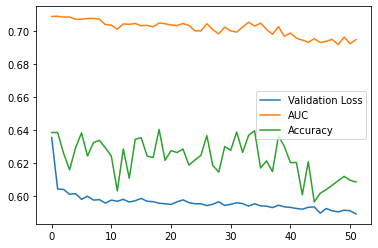

              precision    recall  f1-score   support

       False       0.70      0.85      0.77      1435
        True       0.63      0.42      0.50       897

    accuracy                           0.68      2332
   macro avg       0.66      0.63      0.63      2332
weighted avg       0.67      0.68      0.66      2332



In [140]:
from matplotlib import pyplot as plt

plt.plot(clf.history['loss'], label='Validation Loss')
plt.plot(clf.history['valid_auc'], label='AUC')
plt.plot(clf.history['valid_balanced_accuracy'], label='Accuracy')

plt.legend()
plt.show()

from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
r = classification_report(y_pred=y_pred,y_true=y_test)
print(r)

## Erklärbarkeit

In [138]:
f_i = pd.Series(clf.feature_importances_)
f_i.index = features
f_i.sort_values(ascending=False)

BW_opponent_odd_pred     0.16
Avg_Team                 0.10
B365_Opponent            0.10
Avg_Opponent             0.09
IW_Team                  0.09
Span_Draw                0.08
B365_Team_odd_pred       0.07
Max_Draw                 0.06
Min_Draw                 0.05
B365_opponent_odd_pred   0.04
BW_Draw                  0.03
B365_Team                0.03
B365_Draw                0.02
Avg_Draw                 0.01
Min_Team                 0.01
Span_Opponent            0.01
BW_Team_odd_pred         0.01
IW_Team_odd_pred         0.01
Ratio_Draw               0.01
Max_Opponent             0.00
Min_Opponent             0.00
IW_Draw                  0.00
Max_Team                 0.00
BW_Team_draw_pred        0.00
IW_opponent_odd_pred     0.00
IW_Opponent              0.00
Team                     0.00
IW_Team_draw_pred        0.00
BW_Team                  0.00
B365_Team_draw_pred      0.00
atHome                   0.00
Ratio_Opponent           0.00
Div                      0.00
Span_Team 

In [139]:
sum(f_i>0.01)

15